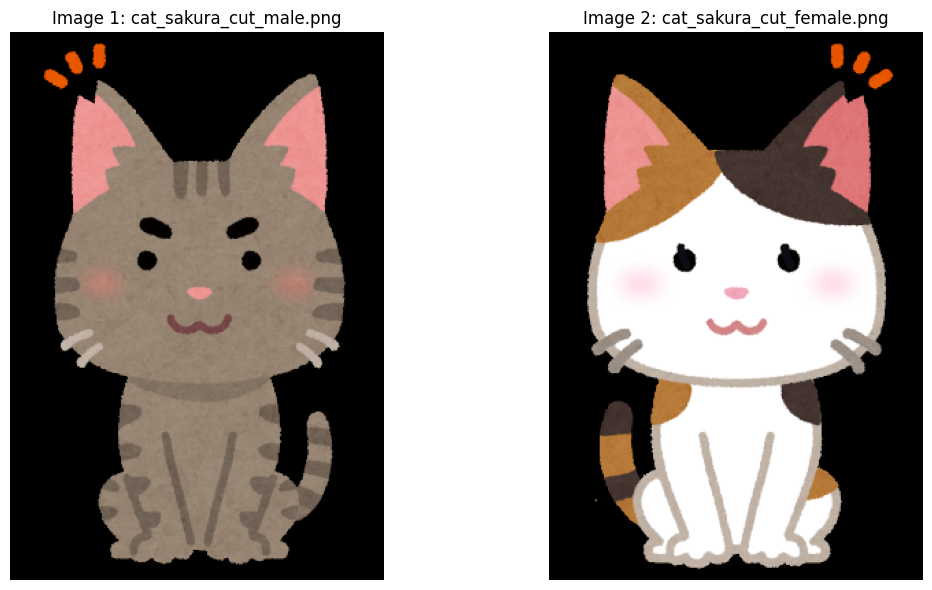

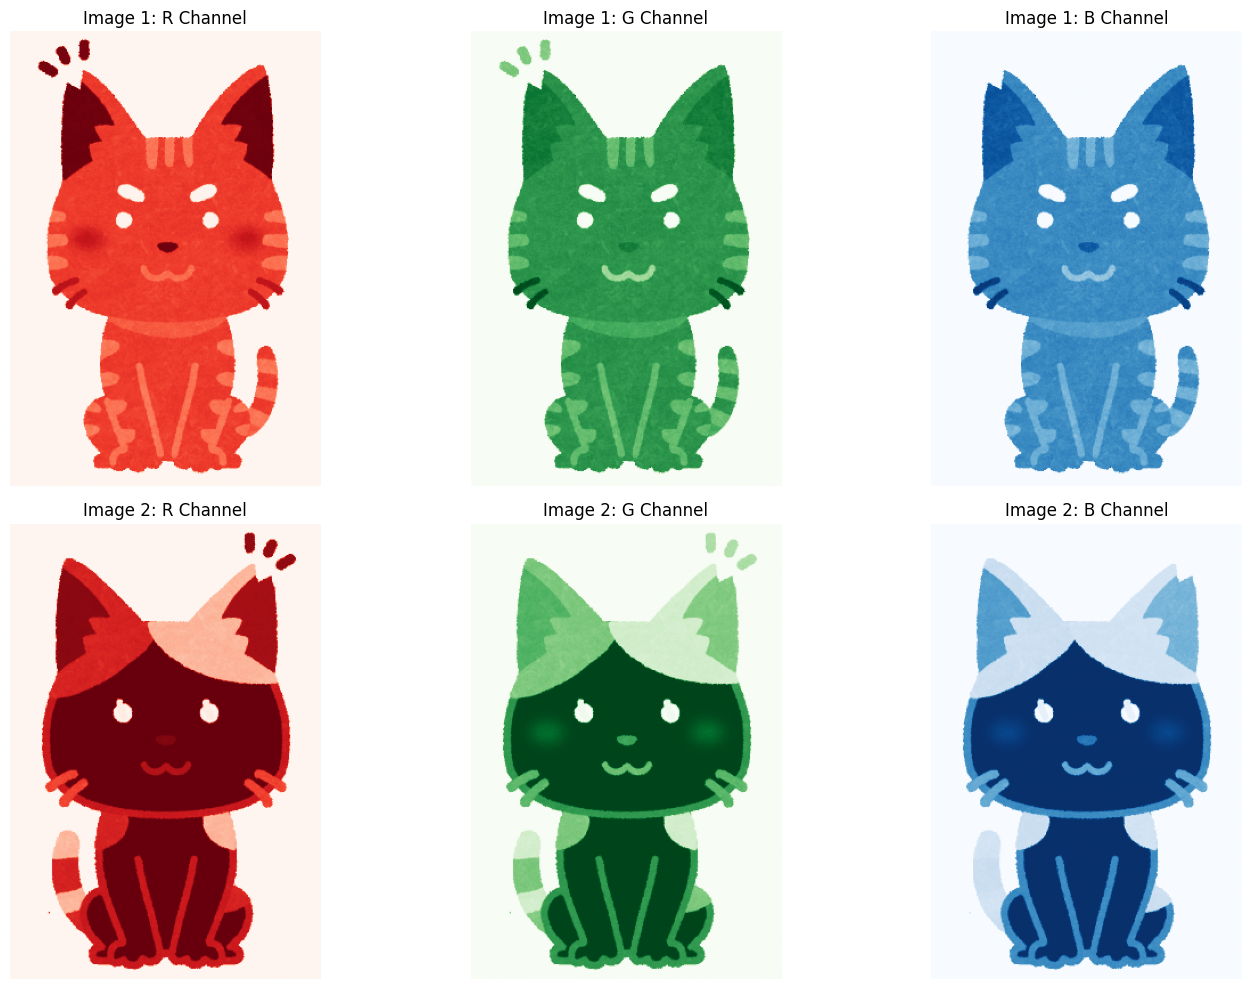

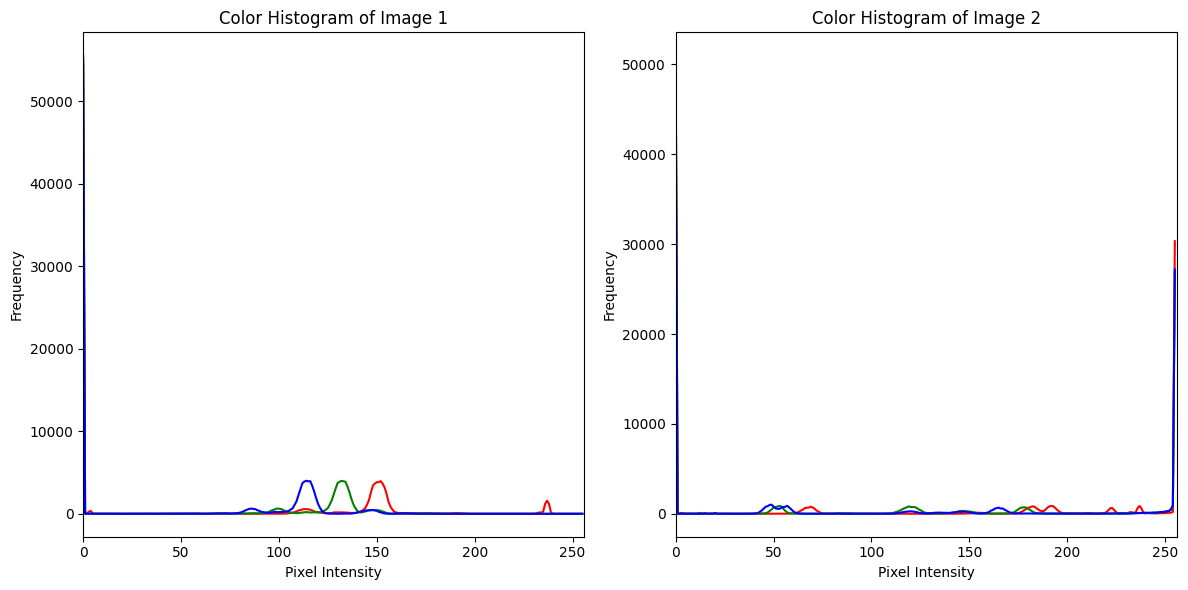

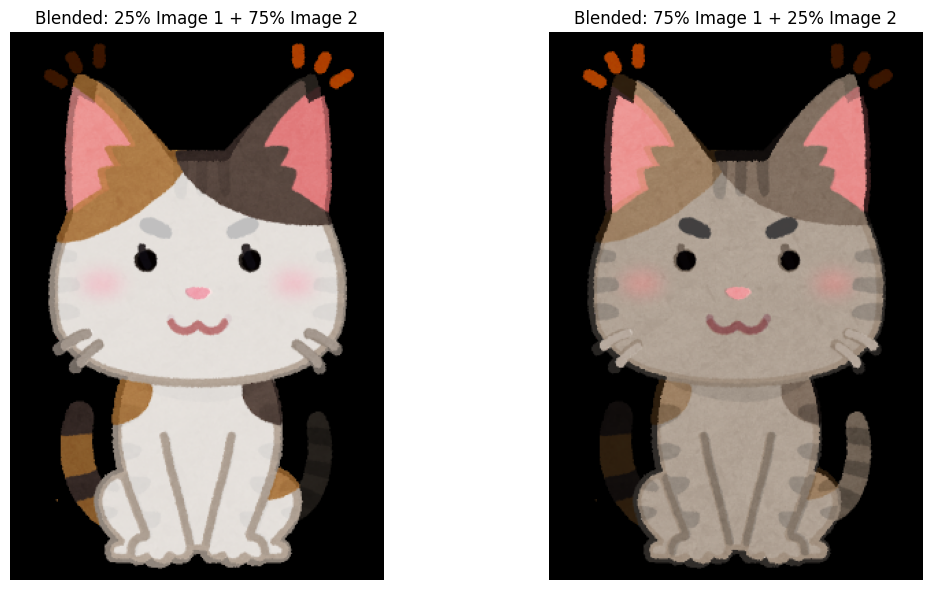

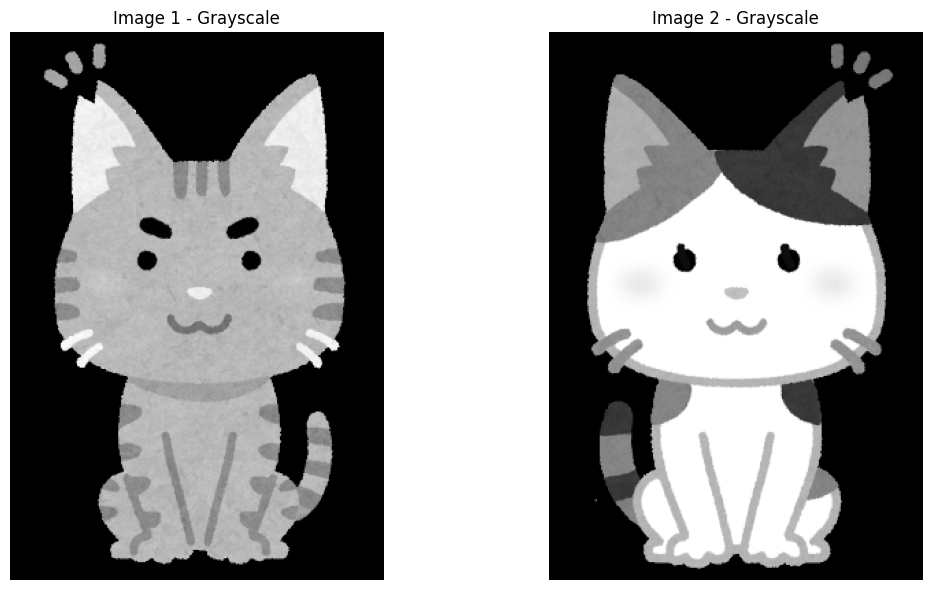

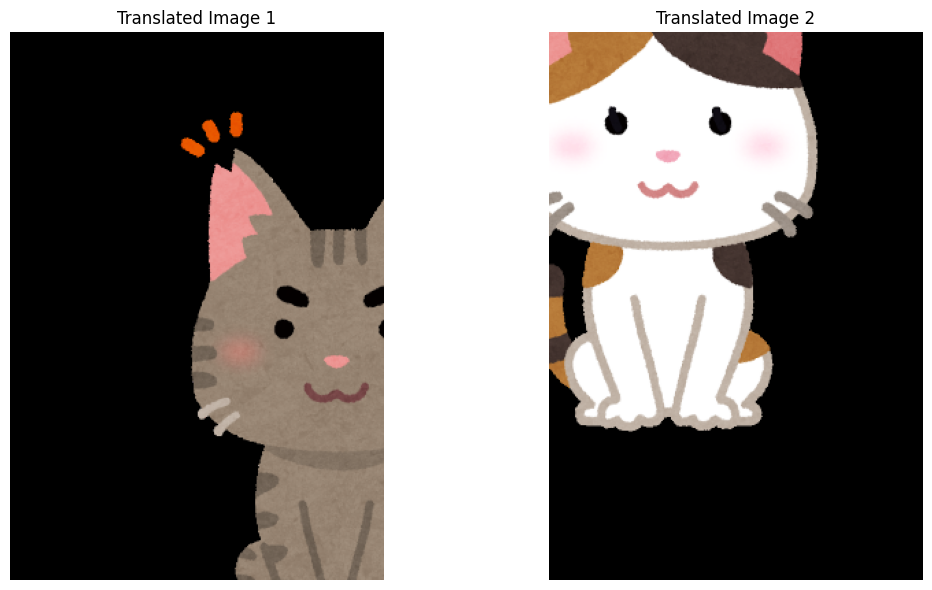

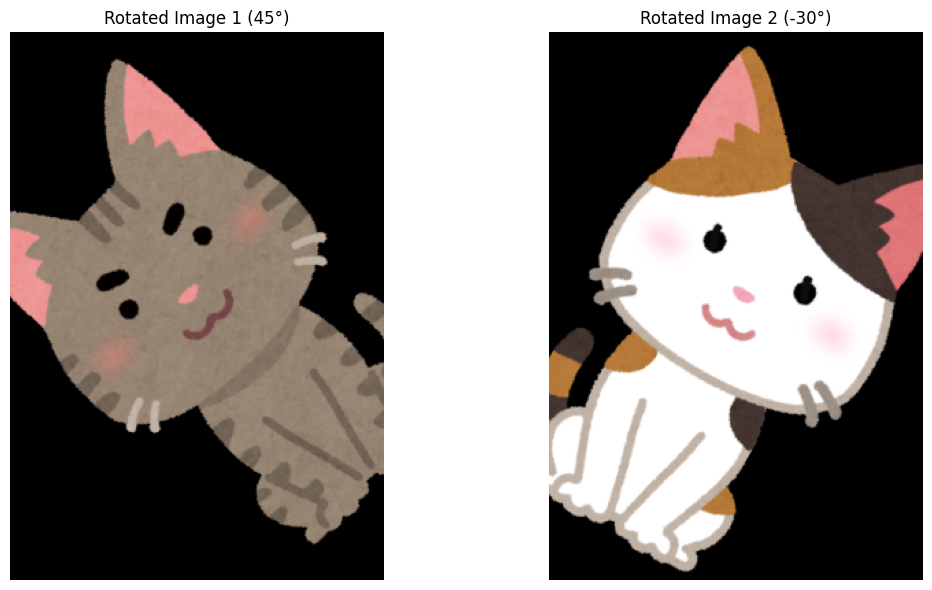

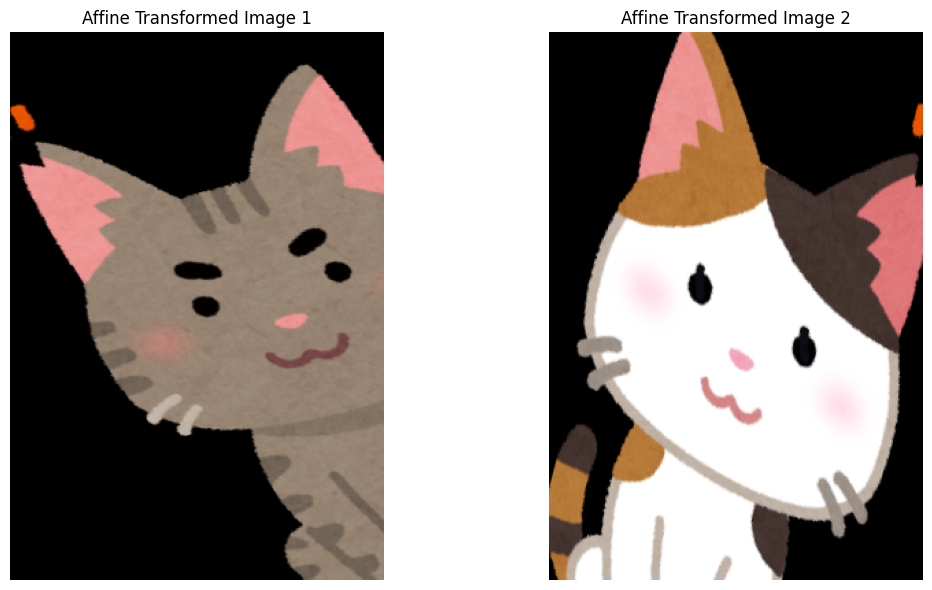

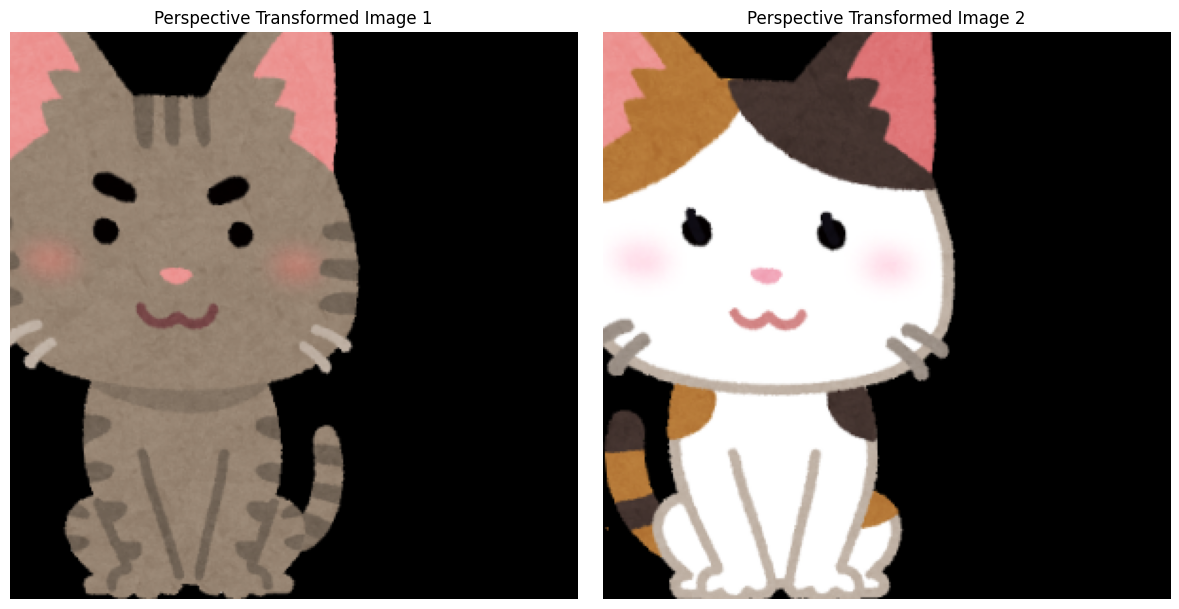

In [9]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob

# Step 1: Read two images from the '/pics' directory
image_extensions = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']
pic_files = []

for ext in image_extensions:
    pic_files.extend(glob(f'./pics/*.{ext}'))
    pic_files.extend(glob(f'./pics/*.{ext.upper()}'))

# Check if we found at least two images
if len(pic_files) < 2:
    print(f"Not enough images found in /pics directory. Found: {len(pic_files)}")
    print("Please make sure at least two images exist in the /pics folder.")
else:
    # Read images and convert from BGR to RGB
    img1_bgr = cv2.imread(pic_files[0])
    img2_bgr = cv2.imread(pic_files[1])
    
    img1_rgb = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
    
    # Step 2: Resize images to have height of 400 pixels while maintaining aspect ratio
    h1, w1, _ = img1_rgb.shape
    h2, w2, _ = img2_rgb.shape
    
    aspect_ratio1 = w1 / h1
    aspect_ratio2 = w2 / h2
    
    new_h = 400
    new_w1 = int(new_h * aspect_ratio1)
    new_w2 = int(new_h * aspect_ratio2)
    
    img1_resized = cv2.resize(img1_rgb, (new_w1, new_h))
    img2_resized = cv2.resize(img2_rgb, (new_w2, new_h))
    
    # Display resized images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img1_resized)
    plt.title(f'Image 1: {os.path.basename(pic_files[0])}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2_resized)
    plt.title(f'Image 2: {os.path.basename(pic_files[1])}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Step 3: Display each channel (R, G, and B) independently for both images
    plt.figure(figsize=(15, 10))
    
    # Image 1 channels
    plt.subplot(2, 3, 1)
    plt.imshow(img1_resized[:, :, 0], cmap='Reds')
    plt.title('Image 1: R Channel')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(img1_resized[:, :, 1], cmap='Greens')
    plt.title('Image 1: G Channel')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(img1_resized[:, :, 2], cmap='Blues')
    plt.title('Image 1: B Channel')
    plt.axis('off')
    
    # Image 2 channels
    plt.subplot(2, 3, 4)
    plt.imshow(img2_resized[:, :, 0], cmap='Reds')
    plt.title('Image 2: R Channel')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(img2_resized[:, :, 1], cmap='Greens')
    plt.title('Image 2: G Channel')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(img2_resized[:, :, 2], cmap='Blues')
    plt.title('Image 2: B Channel')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Step 4: Get the color histogram for each image
    plt.figure(figsize=(12, 6))
    
    # Histogram for Image 1
    plt.subplot(1, 2, 1)
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([img1_resized], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram of Image 1')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    # Histogram for Image 2
    plt.subplot(1, 2, 2)
    for i, col in enumerate(color):
        hist = cv2.calcHist([img2_resized], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram of Image 2')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Step 5: Make the images the same size (width) for blending
    min_width = min(new_w1, new_w2)
    
    # Crop both images to the same width
    img1_cropped = img1_resized[:, :min_width, :]
    img2_cropped = img2_resized[:, :min_width, :]
    
    # Display the blended images
    plt.figure(figsize=(12, 6))
    
    # Blend with weights 0.25 and 0.75
    blended1 = cv2.addWeighted(img1_cropped, 0.25, img2_cropped, 0.75, 0)
    plt.subplot(1, 2, 1)
    plt.imshow(blended1)
    plt.title('Blended: 25% Image 1 + 75% Image 2')
    plt.axis('off')
    
    # Blend with weights 0.75 and 0.25
    blended2 = cv2.addWeighted(img1_cropped, 0.75, img2_cropped, 0.25, 0)
    plt.subplot(1, 2, 2)
    plt.imshow(blended2)
    plt.title('Blended: 75% Image 1 + 25% Image 2')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Step 6: Convert to grayscale and display
    img1_gray = cv2.cvtColor(img1_resized, cv2.COLOR_RGB2GRAY)
    img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_RGB2GRAY)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1_gray, cmap='gray')
    plt.title('Image 1 - Grayscale')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2_gray, cmap='gray')
    plt.title('Image 2 - Grayscale')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Step 7: Translation
# Translate image 1 by 100 pixels right and 50 pixels down
rows1, cols1 = img1_resized.shape[:2]
M1 = np.float32([[1, 0, 100], [0, 1, 50]])
translated1 = cv2.warpAffine(img1_resized, M1, (cols1, rows1))

# Translate image 2 by 50 pixels left and 100 pixels up
rows2, cols2 = img2_resized.shape[:2]
M2 = np.float32([[1, 0, -50], [0, 1, -100]])
translated2 = cv2.warpAffine(img2_resized, M2, (cols2, rows2))

# Display translated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(translated1)
plt.title('Translated Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated2)
plt.title('Translated Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 8: Rotation
# Rotate image 1 by 45 degrees clockwise around the center
center1 = (cols1 // 2, rows1 // 2)
M_rot1 = cv2.getRotationMatrix2D(center1, 45, 1)
rotated1 = cv2.warpAffine(img1_resized, M_rot1, (cols1, rows1))

# Rotate image 2 by -30 degrees (counter-clockwise) around the center
center2 = (cols2 // 2, rows2 // 2)
M_rot2 = cv2.getRotationMatrix2D(center2, -30, 1)
rotated2 = cv2.warpAffine(img2_resized, M_rot2, (cols2, rows2))

# Display rotated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotated1)
plt.title('Rotated Image 1 (45°)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated2)
plt.title('Rotated Image 2 (-30°)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 9: Affine Transformation
# Define points for affine transformation on image 1
pts1_src = np.float32([[50, 50], [200, 50], [50, 200]])
pts1_dst = np.float32([[10, 100], [200, 50], [100, 250]])
M_aff1 = cv2.getAffineTransform(pts1_src, pts1_dst)
affine1 = cv2.warpAffine(img1_resized, M_aff1, (cols1, rows1))

# Define points for affine transformation on image 2
pts2_src = np.float32([[50, 50], [200, 50], [50, 200]])
pts2_dst = np.float32([[100, 10], [250, 100], [50, 200]])
M_aff2 = cv2.getAffineTransform(pts2_src, pts2_dst)
affine2 = cv2.warpAffine(img2_resized, M_aff2, (cols2, rows2))

# Display affine transformed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(affine1)
plt.title('Affine Transformed Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(affine2)
plt.title('Affine Transformed Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 10: Perspective Transformation
# Define points for perspective transformation on image 1
pts1_persp_src = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts1_persp_dst = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M_persp1 = cv2.getPerspectiveTransform(pts1_persp_src, pts1_persp_dst)
persp1 = cv2.warpPerspective(img1_resized, M_persp1, (300, 300))

# Define points for perspective transformation on image 2
pts2_persp_src = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2_persp_dst = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M_persp2 = cv2.getPerspectiveTransform(pts2_persp_src, pts2_persp_dst)
persp2 = cv2.warpPerspective(img2_resized, M_persp2, (300, 300))

# Display perspective transformed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(persp1)
plt.title('Perspective Transformed Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(persp2)
plt.title('Perspective Transformed Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

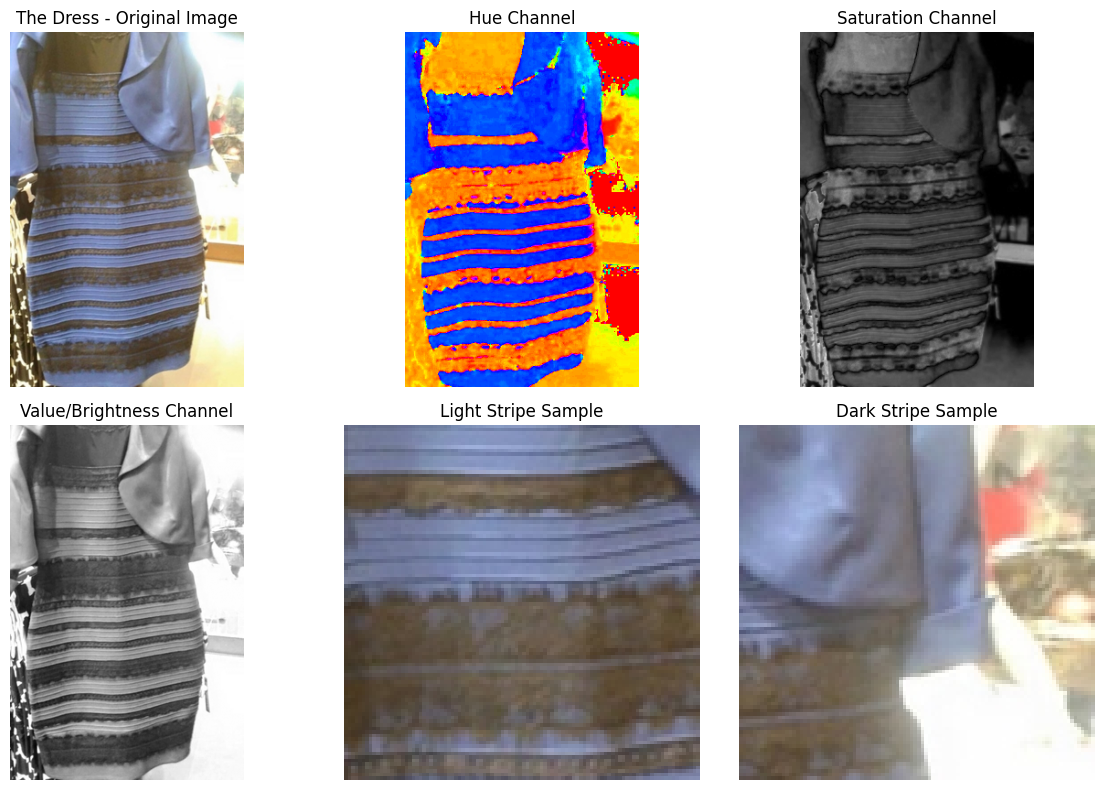

Actual RGB values in the image:
Light stripe average RGB: R=103.9, G=101.0, B=107.7
Dark stripe average RGB: R=162.4, G=157.9, B=159.3

HSV values:
Light stripe average HSV: H=66.1, S=60.9, V=120.1
Dark stripe average HSV: H=60.7, S=42.1, V=174.4


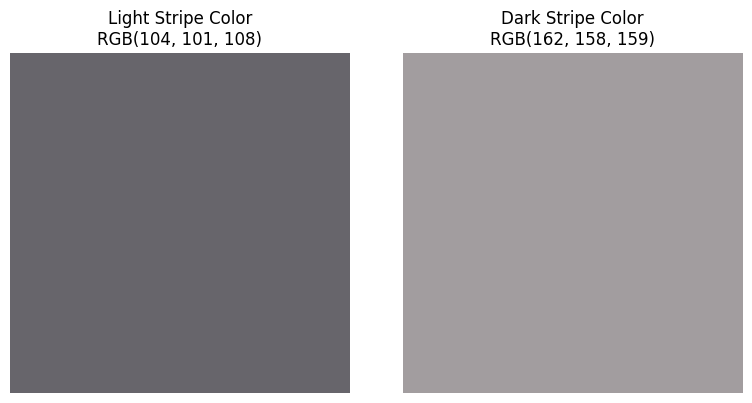

In [11]:
# Load the dress image (you'll need to download it first)
dress_img = cv2.imread('./pics/the_dress.jpg')
dress_rgb = cv2.cvtColor(dress_img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(dress_rgb)
plt.title('The Dress - Original Image')
plt.axis('off')

# Convert to different color spaces for analysis
dress_hsv = cv2.cvtColor(dress_rgb, cv2.COLOR_RGB2HSV)
dress_lab = cv2.cvtColor(dress_rgb, cv2.COLOR_RGB2LAB)

# Display HSV channels
plt.subplot(2, 3, 2)
plt.imshow(dress_hsv[:,:,0], cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dress_hsv[:,:,1], cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(dress_hsv[:,:,2], cmap='gray')
plt.title('Value/Brightness Channel')
plt.axis('off')

# Sample specific regions of the dress
# Define regions for the dress stripes (adjusted for image dimensions)
light_stripe_region = dress_rgb[100:200, 50:150]   # Light stripe sample
dark_stripe_region = dress_rgb[80:180, 150:250]    # Dark stripe sample

plt.subplot(2, 3, 5)
plt.imshow(light_stripe_region)
plt.title('Light Stripe Sample')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(dark_stripe_region)
plt.title('Dark Stripe Sample')
plt.axis('off')

plt.tight_layout()
plt.show()

# Analyze the actual RGB values
light_stripe_mean = np.mean(light_stripe_region.reshape(-1, 3), axis=0)
dark_stripe_mean = np.mean(dark_stripe_region.reshape(-1, 3), axis=0)

print("Actual RGB values in the image:")
print(f"Light stripe average RGB: R={light_stripe_mean[0]:.1f}, G={light_stripe_mean[1]:.1f}, B={light_stripe_mean[2]:.1f}")
print(f"Dark stripe average RGB: R={dark_stripe_mean[0]:.1f}, G={dark_stripe_mean[1]:.1f}, B={dark_stripe_mean[2]:.1f}")

# Convert to HSV for better color analysis
light_hsv = cv2.cvtColor(light_stripe_region.reshape(1, -1, 3), cv2.COLOR_RGB2HSV)[0]
dark_hsv = cv2.cvtColor(dark_stripe_region.reshape(1, -1, 3), cv2.COLOR_RGB2HSV)[0]

light_hsv_mean = np.mean(light_hsv, axis=0)
dark_hsv_mean = np.mean(dark_hsv, axis=0)

print(f"\nHSV values:")
print(f"Light stripe average HSV: H={light_hsv_mean[0]:.1f}, S={light_hsv_mean[1]:.1f}, V={light_hsv_mean[2]:.1f}")
print(f"Dark stripe average HSV: H={dark_hsv_mean[0]:.1f}, S={dark_hsv_mean[1]:.1f}, V={dark_hsv_mean[2]:.1f}")

# Create color swatches to visualize the actual colors
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
light_swatch = np.full((100, 100, 3), light_stripe_mean/255.0)
dark_swatch = np.full((100, 100, 3), dark_stripe_mean/255.0)

axes[0].imshow(light_swatch)
axes[0].set_title(f'Light Stripe Color\nRGB({light_stripe_mean[0]:.0f}, {light_stripe_mean[1]:.0f}, {light_stripe_mean[2]:.0f})')
axes[0].axis('off')

axes[1].imshow(dark_swatch)
axes[1].set_title(f'Dark Stripe Color\nRGB({dark_stripe_mean[0]:.0f}, {dark_stripe_mean[1]:.0f}, {dark_stripe_mean[2]:.0f})')
axes[1].axis('off')

plt.tight_layout()
plt.show()